In [11]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data_path = r"C:\Users\sai\Desktop\brain tumour"
categories = ['yes', 'no']  
img_size = 128  

data = []
for category in categories:
    folder_path = os.path.join(data_path, category)
    label = categories.index(category)
    for img in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img)
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (img_size, img_size))
        data.append([image, label])

np.random.shuffle(data)

X = np.array([i[0] for i in data]).reshape(-1, img_size, img_size, 1)
y = np.array([i[1] for i in data])

X = X / 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

Epoch 1/10
1/1 [==============================] - 5s 5s/step - loss: 0.6910 - accuracy: 0.5000 - val_loss: 1.3447 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 1s 717ms/step - loss: 1.1653 - accuracy: 0.5000 - val_loss: 0.7135 - val_accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 1s 749ms/step - loss: 0.5903 - accuracy: 0.7500 - val_loss: 1.1842 - val_accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 1s 569ms/step - loss: 0.6913 - accuracy: 0.7500 - val_loss: 1.0850 - val_accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 1s 555ms/step - loss: 0.5646 - accuracy: 0.8125 - val_loss: 0.8489 - val_accuracy: 0.2500
Epoch 6/10
1/1 [==============================] - 1s 603ms/step - loss: 0.4736 - accuracy: 0.8125 - val_loss: 0.7619 - val_accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 1s 599ms/step - loss: 0.3253 - accuracy: 0.8125 - val_loss: 0.7601 - val_accuracy: 0.5000
Epoch 8/10
1/1 [=======

Epoch 1/10
1/1 [==============================] - 1s 650ms/step - loss: 0.2421 - accuracy: 0.8750 - val_loss: 1.1913 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 1s 595ms/step - loss: 0.1634 - accuracy: 1.0000 - val_loss: 1.0091 - val_accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 1s 638ms/step - loss: 0.1897 - accuracy: 0.9375 - val_loss: 0.9659 - val_accuracy: 0.2500
Epoch 4/10
1/1 [==============================] - 1s 780ms/step - loss: 0.2309 - accuracy: 0.8750 - val_loss: 1.0314 - val_accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 1s 514ms/step - loss: 0.0738 - accuracy: 1.0000 - val_loss: 1.2404 - val_accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 1s 550ms/step - loss: 0.1010 - accuracy: 1.0000 - val_loss: 1.5477 - val_accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 1s 576ms/step - loss: 0.0528 - accuracy: 1.0000 - val_loss: 2.0773 - val_accuracy: 0.5000
Epoch 8/10
1/1 [====

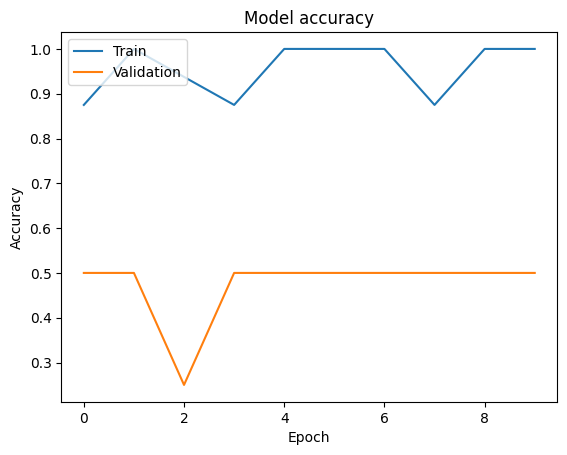

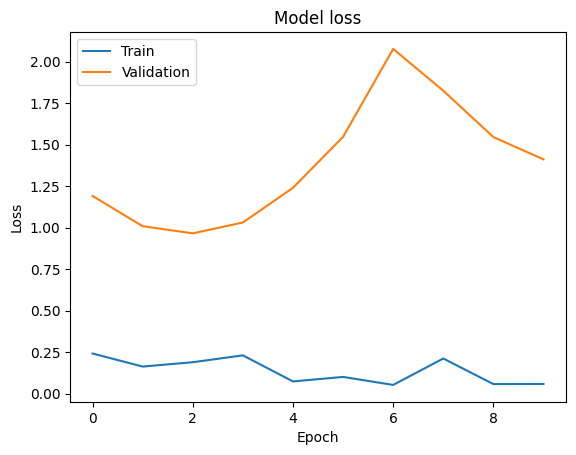

In [12]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()